# Simulate PDF and CDF (built-in function and direct accumulate of pdf)

      x       pdf
0 -5.00  0.000001
1 -4.99  0.000002
2 -4.98  0.000002
3 -4.97  0.000002
4 -4.96  0.000002


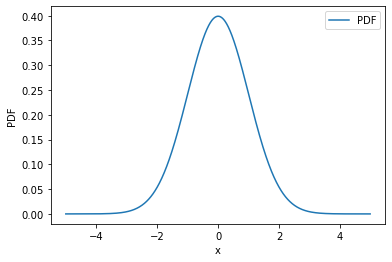

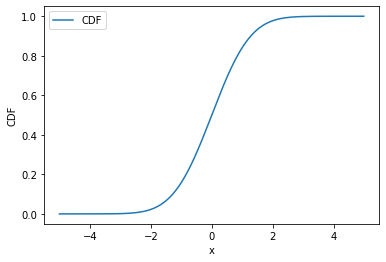

CDF actual 0.503989 vs calculated 0.505984 for F_x(0.01)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# PDF Example
mu, sigma = 0, 1
x = np.arange(-5, 5, 0.01)
pdf = norm.pdf(x, mu, sigma)

data = {'x': x, 'pdf': pdf}
df = pd.DataFrame(data)

print(df.head(5))

plt.plot(df['x'], df['pdf'], label="PDF")
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend()
plt.savefig('pdf.png')
plt.show()

# CDF
cdf = norm.cdf(x, mu, sigma)
df['cdf'] = cdf

plt.plot(df['x'], df['cdf'], label="CDF")
plt.xlabel('x')
plt.ylabel('CDF')
plt.legend()
plt.savefig('cdf.png')
plt.show()

# Quick and dirty integration of the PDF
# 0.01 is the interval for each point
# we assume that the probability of each point in the interval are the same
n = 501
approxCDF = 0.0
for i in range(1, n + 1):
    approxCDF += df['pdf'][i] * 0.01

print(f"CDF actual {df['cdf'][n]:.6f} vs calculated {approxCDF:.6f} for F_x({df['x'][n]:.2f})")